In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # For progress tracking

In [8]:

dataset_path = "/Users/aditrichaudhuri/PetImages"


IMG_SIZE = (64, 64)  # Resize all images to 64x64

# Load images and labels
X = []
y = []


for label, category in enumerate(["Cat", "Dog"]):  # 0: Cat, 1: Dog
    folder = os.path.join(dataset_path, category)
    
    for file in tqdm(os.listdir(folder)[:1000]):  
        img_path = os.path.join(folder, file)
        
        
        img = load_img(img_path, target_size=IMG_SIZE, color_mode="grayscale")
        
        # Convert to array and normalize pixel values (0 to 1)
        img_array = img_to_array(img) / 255.0
        
        
        img_flattened = img_array.flatten()
        
        
        X.append(img_flattened)
        y.append(label)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 824.59it/s]


In [18]:
"""
dataset_path = "/Users/aditrichaudhuri/PetImages"


IMG_SIZE = (64, 64)  # Resize all images to 64x64

# Load images and labels
X = []
y = []


for label, category in enumerate(["Cat", "Dog"]):  # 0: Cat, 1: Dog
    folder = os.path.join(dataset_path, category)
    
    for file in tqdm(os.listdir(folder)[:1000]):  
        img_path = os.path.join(folder, file)
        
        
        img = load_img(img_path, target_size=IMG_SIZE, color_mode="grayscale")
        
        img_array = img_to_array(img)

        # Flattened image array
        img_flattened = img_array.flatten()

        # Initialize MinMaxScaler to scale between 0 and 1
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Reshape to 2D for scaler (it expects a 2D array)
        img_flattened = img_flattened.reshape(-1, 1)

        # Fit and transform
        img_normalized = scaler.fit_transform(img_flattened)

        # Reshape back to original flattened shape if needed
        img_normalized = img_normalized.flatten()

        print(img_normalized)  # Normalized pixel values between 0 and 1

        X.append(img_normalized)
        y.append(label)

"""

 14%|█████▎                                 | 135/1000 [00:00<00:01, 691.02it/s]

[0.6991525  0.69491524 0.5        ... 0.5423729  0.5423729  0.7076271 ]
[0.43307087 0.33070865 0.30708662 ... 0.04724409 0.03149606 0.13779527]
[0.33870965 0.33870965 0.3346774  ... 0.75       0.7016129  0.63709676]
[0.4978903  0.34177214 0.35443035 ... 0.949367   0.9915611  0.9915611 ]
[0.20731707 0.2398374  0.3495935  ... 0.70731705 0.64634144 0.6300813 ]
[0.64285713 0.65966386 0.6260504  ... 0.5        0.35294122 0.31092438]
[0.6398305  0.59745765 0.58474576 ... 0.8559322  0.8177966  0.83898306]
[0.74347824 0.7565217  0.7608695  ... 0.36086956 0.28695652 0.30869564]
[0.482906   0.46153852 0.457265   ... 0.2905983  0.22649574 0.19658121]
[0.19008264 0.16115701 0.10330577 ... 0.3677686  0.35123965 0.3429752 ]
[0.19215688 0.14509805 0.16470589 ... 0.01568628 0.10980393 0.28627452]
[0.5772357  0.5691056  0.5691056  ... 0.48373982 0.5325203  0.49999997]
[0.19200002 0.20000002 0.21600002 ... 0.46400002 0.28       0.34      ]
[0.10699588 0.12345679 0.16872427 ... 0.5144032  0.54732513 0.54

 30%|███████████▋                           | 299/1000 [00:00<00:00, 771.57it/s]

[0.27450982 0.04705883 0.04313726 ... 0.58431375 0.5882353  0.58431375]
[0.01626016 0.0203252  0.02845528 ... 0.58943087 0.65853655 0.59756094]
[0.31547618 0.22619048 0.32738096 ... 0.66071427 0.64880955 0.55357146]
[0.53431374 0.56372553 0.5441177  ... 0.7401961  0.77450985 0.8529412 ]
[0.8271605  0.69135803 0.80246913 ... 0.00823045 0.01234568 0.01234568]
[0.12903225 0.12903225 0.13364056 ... 0.4608295  0.43317974 0.47926268]
[0.7632653  0.7632653  0.75510204 ... 0.59999996 0.5836735  0.5836735 ]
[0.19758064 0.21370967 0.6008065  ... 0.14516129 0.11693548 0.10887095]
[0.07291667 0.07291667 0.078125   ... 0.02083333 0.015625   0.07291667]
[0.0509804  0.02745098 0.04313726 ... 0.07450981 0.05490196 0.05882353]
[0.24901187 0.25296444 0.29249012 ... 0.5889328  0.5810277  0.5612649 ]
[0.43231443 0.4279476  0.4235808  ... 0.7772926  0.78602624 0.77292573]
[0.09375    0.09821429 0.09821429 ... 0.84375    0.82589287 0.7589286 ]
[0.46963564 0.48582998 0.17004049 ... 0.61538464 0.75303644 0.62

 47%|██████████████████▎                    | 469/1000 [00:00<00:00, 813.03it/s]

[0.8313726  0.34117648 0.24313727 ... 0.20784315 0.20392159 0.20000002]
[0.5294118  0.5336135  0.5336135  ... 0.98319334 0.99159664 1.        ]
[0.78346455 0.78346455 0.78346455 ... 0.43700787 0.22047244 0.19291338]
[0.09027779 0.09722224 0.10416666 ... 0.6736111  0.6597222  0.6527778 ]
[0.26605505 0.25688073 0.2706422  ... 0.35779816 0.21559632 0.2614679 ]
[0.53333336 0.38431376 0.38431376 ... 0.8862746  0.8117648  0.7686275 ]
[0.7653061 0.7653061 0.7755102 ... 0.6887755 0.6785714 0.6887755]
[0.10483871 0.11290321 0.11693548 ... 0.33870965 0.3266129  0.37903222]
[0.43137258 0.40784317 0.4431373  ... 0.5294118  0.45882356 0.38431376]
[0.96000004 0.97200006 0.9760001  ... 0.128      0.18       0.244     ]
[0.30864197 0.30864197 0.35390946 ... 0.10288066 0.11522633 0.19341563]
[0.40873018 0.24603178 0.27380952 ... 0.32539684 0.21031748 0.22222224]
[0.70325196 0.7357724  0.67886174 ... 0.73170733 0.78861785 0.7723577 ]
[0.20361991 0.20361991 0.22171947 ... 0.47963804 0.40271494 0.33484164

 64%|█████████████████████████              | 644/1000 [00:00<00:00, 846.67it/s]

[1.         0.95555556 0.36       ... 0.9333334  0.9822222  0.6977778 ]
[0.14537445 0.18942732 0.16740087 ... 0.6960352  0.66960347 0.64757705]
[0.8545455  0.8318181  0.81818175 ... 0.8136363  0.79090905 0.8227272 ]
[0.4162162  0.44324327 0.43783784 ... 0.67567563 0.18378377 0.14594597]
[0.6792453 0.7122641 0.6650943 ... 0.7877358 0.8018868 0.7216981]
[0.08627451 0.08627451 0.07058824 ... 0.9568628  0.8745099  0.79215693]
[0.38818562 0.34599152 0.36286917 ... 0.37552738 0.23206751 0.39662445]
[0.29803923 0.3019608  0.3254902  ... 0.8862746  0.9058824  0.85098046]
[0.59313726 0.5833334  0.59803927 ... 0.4362745  0.42156866 0.4264706 ]
[0.54800004 0.58800006 0.61600006 ... 0.388      0.36400002 0.328     ]
[0.08474576 0.07909605 0.02259887 ... 0.27118644 0.32768363 0.26553673]
[0.7016807 0.7100841 0.7100841 ... 0.684874  0.697479  0.697479 ]
[0.05945948 0.03783783 0.05405405 ... 0.572973   0.6108109  0.60540545]
[0.10980393 0.1764706  0.27450982 ... 0.0509804  0.02745098 0.03921569]
[0.8

 73%|████████████████████████████▍          | 729/1000 [00:00<00:00, 838.77it/s]

[0.2034632  0.18181819 0.3030303  ... 0.29870132 0.7099567  0.1948052 ]
[0.6331878  0.6462882  0.6637555  ... 0.768559   0.76419216 0.75545853]
[0.01363636 0.00454545 0.00909091 ... 0.6772727  0.7363636  0.85909086]
[0.24166667 0.24166667 0.24583334 ... 0.95000005 0.94583344 0.95000005]
[0.91322315 0.74793386 0.92561984 ... 0.8677686  0.4380165  0.36363634]
[0.565737   0.5737052  0.58167326 ... 0.77290833 0.7131474  0.01992032]
[0.12916666 0.06666666 0.1375     ... 0.7041667  0.7541667  0.74166673]
[0.8433735  0.8433735  0.8433735  ... 0.76706827 0.7831325  0.77510035]
[0.2315271  0.2413793  0.29064038 ... 0.16748768 0.1133005  0.08866996]
[0.1589958  0.23849371 0.30125523 ... 0.48535562 0.43096232 0.9707113 ]
[0.3090129  0.28326178 0.18454935 ... 0.30042917 0.29613733 0.31330472]
[0.14592275 0.14592275 0.1502146  ... 0.69957083 0.61373395 0.6866953 ]
[0.2549801  0.2549801  0.17529881 ... 0.7529881  0.8207172  0.80478096]
[0.38793102 0.39224136 0.40086207 ... 0.01293103 0.01724138 0.  

 90%|███████████████████████████████████▎   | 905/1000 [00:01<00:00, 856.03it/s]

[0.6208334  0.6458334  0.6208334  ... 0.55       0.5791667  0.55833334]
[0.15294118 0.16862746 0.18431373 ... 0.1254902  0.08235294 0.07450981]
[0.02745098 0.20784315 0.2901961  ... 0.15294118 0.16470589 0.1764706 ]
[0.07075472 0.07075472 0.06132076 ... 0.05188679 0.00471698 0.00943396]
[0.9427312  0.9339207  0.93832594 ... 0.39647573 0.43171802 0.38766518]
[0.67241377 0.67241377 0.6810345  ... 0.51724136 0.51724136 0.5086207 ]
[0.49781656 0.52401745 0.069869   ... 0.12227075 0.139738   0.2139738 ]
[0.09803922 0.1137255  0.1764706  ... 0.7411765  0.82745105 0.5019608 ]
[0.25882354 0.8705883  0.7411765  ... 0.4901961  0.48627454 0.38823533]
[0.21343873 0.20553361 0.19367589 ... 0.8932807  0.8616601  0.8418973 ]
[0.05150215 0.05150215 0.04721031 ... 0.94420594 0.9270386  0.94420594]
[0.77952754 0.36220473 0.3503937  ... 0.2519685  0.2913386  0.33858266]
[0.81124496 0.73092365 0.72289157 ... 0.42168674 0.45783132 0.4819277 ]
[0.5144033  0.5308642  0.5390947  ... 0.39917693 0.3786008  0.34

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 817.64it/s]


[0.8151261  0.8193278  0.8193278  ... 0.7857143  0.7941177  0.76050425]
[0.3026316  0.34210527 0.3377193  ... 0.78070176 0.7324561  0.78070176]
[0.94400007 0.85200006 0.87600005 ... 0.87600005 0.8600001  0.87200004]
[0.27038628 0.3648069  0.3862661  ... 0.4549356  0.39484978 0.39484978]
[0.16751269 0.26395938 0.2538071  ... 0.12690355 0.22335026 0.08121827]
[0.62439024 0.42439026 0.44878048 ... 0.27317074 0.30243903 0.19512194]
[0.7540983  0.76639336 0.762295   ... 0.68032783 0.66803277 0.68032783]
[0.44392523 0.41588783 0.41588783 ... 0.12149532 0.11682242 0.11214952]
[0.18867925 0.1745283  0.1509434  ... 0.10849056 0.10377358 0.05660378]
[0.65975106 0.65975106 0.65975106 ... 0.7676349  0.66390043 0.81742746]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))
  8%|███                                     | 76/1000 [00:00<00:01, 750.43it/s]

[0.17131475 0.16334662 0.17131475 ... 0.7569721  0.7968128  0.8247012 ]
[0.37795275 0.4015748  0.4055118  ... 0.43307087 0.492126   0.39370078]
[0.714876  0.7355372 0.7438016 ... 0.8884297 0.8636363 0.8801653]
[0.236      0.284      0.312      ... 0.164      0.264      0.16000001]
[0.39545453 0.46818185 0.45       ... 0.59090906 0.43636364 0.4909091 ]
[0.28508773 0.4473684  0.5877193  ... 0.09210527 0.20175439 0.25877193]
[0.12087913 0.10989012 0.0934066  ... 0.08791209 0.0989011  0.0934066 ]
[0.6694215  0.6652892  0.6487603  ... 0.33057848 0.29752064 0.22314048]
[0.996063   0.992126   0.86614174 ... 0.97244096 0.96456695 0.9527559 ]
[0.06299213 0.0511811  0.0511811  ... 0.20866142 0.22834645 0.26377952]
[0.02459016 0.0204918  0.09016393 ... 0.00819672 0.00819672 0.01229508]
[0.5289256  0.5371901  0.62396693 ... 0.39256197 0.40495867 0.4380165 ]
[0.02727273 0.02727273 0.04090909 ... 0.49545452 0.48636362 0.51363635]
[0.22222224 0.3015873  0.46825397 ... 0.0952381  0.0873016  0.05158731

 24%|█████████▏                             | 235/1000 [00:00<00:00, 778.25it/s]

[0.16847828 0.10869566 0.04347827 ... 0.27173916 0.40760872 0.38043478]
[0.4051724  0.25       0.3663793  ... 0.6551724  0.67672414 0.7155172 ]
[0.8000001  0.81568635 0.80392164 ... 0.7411765  0.7176471  0.73333335]
[0.77642274 0.804878   0.80894303 ... 0.46747965 0.45934957 0.46747965]
[0.22529645 0.91699606 0.6047431  ... 0.58498025 0.5494071  0.48616603]
[0.5826772  0.5629921  0.6023622  ... 0.39763778 0.31102362 0.4448819 ]
[0.4208145  0.4886878  0.44796383 ... 0.34841633 0.37104076 0.35294122]
[1. 1. 1. ... 1. 1. 1.]
[0.35123965 0.38016528 0.38016528 ... 0.44214875 0.40495867 0.5413223 ]
[0.40692642 0.34632033 0.39826837 ... 0.14285713 0.3073593  0.39826837]
[0.38823533 0.13725491 0.13725491 ... 0.86274517 0.80392164 0.8352942 ]
[0.22400002 0.18800001 0.304      ... 0.328      0.44       0.476     ]
[0.80288464 0.86538464 0.8557693  ... 0.55288464 0.5432693  0.5480769 ]
[0.35714287 0.41428572 0.32857144 ... 0.8428572  0.9761905  0.8428572 ]
[0.03529412 0.04705883 0.03529412 ... 0.

 39%|███████████████▏                       | 391/1000 [00:00<00:00, 771.32it/s]

[0.41584158 0.53960395 0.54950494 ... 0.4059406  0.25247523 0.22772276]
[0.4606299  0.52755904 0.42913386 ... 0.41732284 0.52755904 0.42519686]
[0.41176474 0.39607847 0.4039216  ... 0.6666667  0.6862745  0.6784314 ]
[0.23555556 0.19555557 0.22666669 ... 0.1688889  0.15555556 0.2       ]
[0.47244096 0.53149605 0.5551181  ... 0.5944882  0.61811024 0.62204725]
[0.42060086 0.17596567 0.06866952 ... 0.3390558  0.32188842 0.45493564]
[0.24590161 0.39754096 0.22950819 ... 0.6065573  0.65573764 0.66393435]
[0.45019922 0.3625498  0.2868526  ... 0.28286853 0.34661356 0.37848607]
[0.54509807 0.7176471  0.70980394 ... 0.03529412 0.03137255 0.03137255]
[0.61417323 0.6732283  0.7440945  ... 0.48425198 0.38188976 0.2952756 ]
[0.64757705 0.62114537 0.68281937 ... 0.5374449  0.4801762  0.67841405]
[0.24999997 0.11065573 0.52459013 ... 0.8647541  0.8606557  0.8278688 ]
[0.00440529 0.00440529 0.00440529 ... 0.47136563 0.55506605 0.30837005]
[0.47342992 0.40579706 0.45410627 ... 0.69082123 0.69082123 0.69

 56%|█████████████████████▋                 | 556/1000 [00:00<00:00, 797.61it/s]

[0.05349794 0.05349794 0.09876543 ... 0.30864197 0.27160493 0.20576131]
[0.14537443 0.14537443 0.14977972 ... 0.5726872  0.44933915 0.5418502 ]
[0.3426295  0.33466136 0.498008   ... 0.70119524 0.66533864 0.10756972]
[0.53543305 0.4055118  0.47637796 ... 0.37401575 0.41732284 0.43700787]
[0.10194175 0.0776699  0.08737864 ... 0.5485437  0.48058254 0.52912617]
[0.2857143  0.2857143  0.29831934 ... 0.8739496  0.8655462  0.86974794]
[0.27225128 0.26701573 0.34554973 ... 0.6649215  0.6649215  0.6544503 ]
[0.31578946 0.39473683 0.37719297 ... 0.71052635 0.8684211  0.38596493]
[0.57086617 0.46456692 0.09842519 ... 0.27165353 0.15748031 0.27559054]
[0.19215688 0.19215688 0.21568629 ... 0.11764707 0.14901961 0.13333334]
[0.36991867 0.24390242 0.29674795 ... 0.9593495  0.9471544  0.94308937]
[0.05737704 0.09016393 0.21721311 ... 0.9139344  0.954918   0.96311474]
[0.5992064  0.5714286  0.5        ... 0.33333334 0.34126985 0.3214286 ]
[0.20866142 0.19291338 0.70472443 ... 0.12204725 0.42913386 0.37

 72%|████████████████████████████▏          | 723/1000 [00:00<00:00, 813.85it/s]

[0.7866667  0.7955556  0.7955556  ... 0.7733334  0.8177778  0.76000005]
[1. 1. 1. ... 1. 1. 1.]
[0.48290598 0.51282054 0.52991456 ... 0.43589747 0.38888893 0.39743593]
[0.31120333 0.31120333 0.34854773 ... 0.2448133  0.2614108  0.27385893]
[0.50627613 0.665272   0.61924684 ... 0.8410042  0.7364017  0.4518828 ]
[0.05158731 0.11111112 0.05555556 ... 0.8055556  0.7261905  0.6230159 ]
[0.24000001 0.172      0.216      ... 0.60800004 0.36       0.67600006]
[1.0000001 1.0000001 1.0000001 ... 1.0000001 1.0000001 1.0000001]
[0.4302789  0.8525897  0.8645419  ... 0.26294822 0.7529881  0.7569722 ]
[0.49029124 0.56796116 0.5631068  ... 0.04368933 0.04854369 0.09223302]
[0.00595238 0.00595238 0.01190476 ... 0.13095239 0.125      0.11309524]
[0.07407409 0.08333334 0.0787037  ... 0.45833334 0.45370373 0.46296296]
[0.6431373 0.627451  0.6431373 ... 0.3803922 0.2901961 0.3803922]
[0.804878   0.8373983  0.7967479  ... 0.3617886  0.31300813 0.4105691 ]
[0.49372384 0.43096232 0.42677823 ... 0.39748952 0.7

 89%|██████████████████████████████████▋    | 889/1000 [00:01<00:00, 813.00it/s]

[0.70124483 0.70124483 0.70124483 ... 0.65975106 0.7053942  0.7095436 ]
[0.68650794 0.6944445  0.70238096 ... 0.4603175  0.9880953  0.8928572 ]
[0.5138889 0.5416667 0.537037  ... 0.5416667 0.537037  0.5138889]
[0.6627451  0.8078432  0.5176471  ... 0.69411767 0.78823537 0.53333336]
[0.58152175 0.5652174  0.5652174  ... 0.65217394 0.65217394 0.65217394]
[0.6344538  0.57563025 0.57563025 ... 0.53361344 0.55042017 0.5420168 ]
[0.09090909 0.03162055 0.07905138 ... 0.28853756 0.23715417 0.284585  ]
[0.3982684  0.67099565 0.74891776 ... 0.5367965  0.61904764 0.44588745]
[0.5882353  0.5529412  0.5019608  ... 0.64705884 0.654902   0.8000001 ]
[0.35882354 0.2882353  0.47058824 ... 0.7647059  0.81764704 0.8       ]
[0.16317992 0.36401674 0.43514642 ... 0.63179916 0.64853555 0.6610879 ]
[0.02409638 0.02409638 0.04016064 ... 0.62650603 0.815261   0.83935744]
[0.09623431 0.209205   0.1297071  ... 0.1338912  0.125523   0.1297071 ]
[0.76800007 0.5960001  0.7120001  ... 0.54800004 0.54800004 0.54800004

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 800.83it/s]

[0.3510204  0.36326528 0.34285712 ... 0.2163265  0.2530612  0.19183671]
[0.1967213  0.23360655 0.28278688 ... 0.4016393  0.13934425 0.5614754 ]
[0.996063 0.996063 0.996063 ... 0.992126 1.       1.      ]
[0.3803922  0.18431373 0.12156864 ... 0.54509807 0.5529412  0.5294118 ]
[0.70982146 0.74107146 0.77678573 ... 0.04910715 0.05357143 0.05803572]
[0.6901961 0.6901961 0.6901961 ... 0.7725491 0.7686275 0.7490196]
[0.24293785 0.24293785 0.21468927 ... 0.8926554  0.8926554  0.8757062 ]
[0.59288543 0.62845856 0.64031625 ... 0.312253   0.32015812 0.32015812]
[0.9011858  0.97233206 0.95256925 ... 0.3636364  0.33201584 0.4545455 ]
[0.8811475  0.84426224 0.84426224 ... 0.9016393  0.9344262  0.96721303]
[0.14893617 0.1787234  0.15319149 ... 0.81702125 0.8297872  0.83829784]
[0.20967741 0.11693548 0.19758064 ... 0.08064516 0.07258064 0.08064516]
[0.2195122  0.20325202 0.12195122 ... 0.3211382  0.3333333  0.29674795]
[0.6184211  0.6184211  0.64035094 ... 0.33333334 0.32894737 0.35526317]
[0.6137339

Test Accuracy: 0.5150


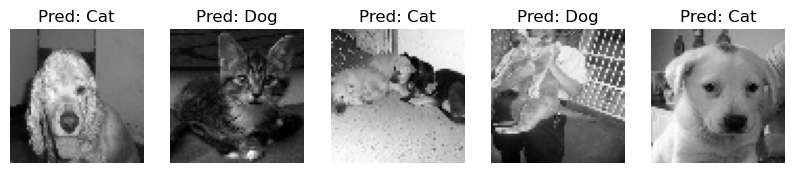

In [20]:
X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")


fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(IMG_SIZE), cmap='gray')
    ax.set_title(f"Pred: {'Dog' if y_pred[i] else 'Cat'}")
    ax.axis("off")
plt.show()


In [25]:
print(X_test)

[[0.37254903 0.36862746 0.37254903 ... 0.22352941 0.10588235 0.08235294]
 [0.07843138 0.06666667 0.07843138 ... 0.12156863 0.11372549 0.09803922]
 [0.15686275 0.16470589 0.21568628 ... 0.7529412  0.69803923 0.74509805]
 ...
 [0.48235294 0.4862745  0.4862745  ... 0.14509805 0.10980392 0.10588235]
 [0.7490196  0.73333335 0.7294118  ... 0.19215687 0.19607843 0.23921569]
 [0.43529412 0.93333334 0.9882353  ... 0.34901962 0.3647059  0.31764707]]


In [31]:
import joblib
from joblib import dump, load

# Save the model
dump(clf, "model.joblib")

# Load the model
#loaded_model = load("model.joblib")


['model.joblib']

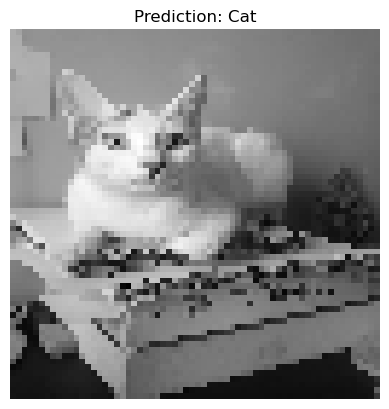

'Cat'

In [35]:
# Load model and run inference
def predict_image(image_path, model_path="model.joblib"):
    clf = joblib.load(model_path)  # Load the saved model
    img = load_img(image_path, target_size=IMG_SIZE, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0  # Normalize
    img_flattened = img_array.flatten().reshape(1, -1)  # Reshape for prediction
    prediction = clf.predict(img_flattened)
    label = "Dog" if prediction[0] else "Cat"
    
    # Display image with prediction
    plt.imshow(img_array.reshape(IMG_SIZE), cmap='gray')
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.show()
    
    return label

predict_image("/Users/aditrichaudhuri/cheeni.jpeg")